<a href="https://colab.research.google.com/github/Deb052024/Data-Wranglling/blob/main/Real_Estate_Digi_Chrome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import root_mean_squared_error


In [5]:
df=pd.read_csv('/content/Property_data (1).csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PropertyID            1460 non-null   int64  
 1   PropertyClass         1460 non-null   int64  
 2   PropertyZone          1460 non-null   object 
 3   PropertyFrontage      1201 non-null   float64
 4   PropertySize          1460 non-null   int64  
 5   Street                1460 non-null   object 
 6   Alley                 91 non-null     object 
 7   PropertyShape         1460 non-null   object 
 8   Elevation             1460 non-null   object 
 9   Amenities             1460 non-null   object 
 10  Orientation           1460 non-null   object 
 11  Grade                 1460 non-null   object 
 12  Neighborhood          1460 non-null   object 
 13  Condition1            1460 non-null   object 
 14  Condition2            1460 non-null   object 
 15  BldgType             

In [7]:
df.columns

Index(['PropertyID', 'PropertyClass', 'PropertyZone', 'PropertyFrontage',
       'PropertySize', 'Street', 'Alley', 'PropertyShape', 'Elevation',
       'Amenities', 'Orientation', 'Grade', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'PropertyStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material',
       'Roof2Material', 'ExteriorCladdingType', 'ExteriorCladdingArea',
       'ExterQual', 'ExterCond', 'PropertyFooting', 'BsmntFinish',
       'BsmntMaintenance', 'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinSty1',
       'BsmntFinQual1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', 'Heating',
       'HeatingEfficiency', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1',
       'Bath2', 'BedroomUpLev', 'KitchenUpLev', 'KitchenQual', 'CntRmsUpLev',
       'Functional', 'CntFireplaces', 'QualFireplace', 'BasementType',
       'BasementYrBlt

In [9]:
#Finding Null Values
df.iloc[:,0:35].isnull().sum()

,0
PropertyID,0
PropertyClass,0
PropertyZone,0
PropertyFrontage,259
PropertySize,0
Street,0
Alley,1369
PropertyShape,0
Elevation,0
Amenities,0


In [13]:
# prompt: fill null values from 1st column to 40 th column  with mean if its int data type else if its object type fill it with Mode

for i in range(0, 40):
  if df.iloc[:, i].dtype == 'int64' or df.iloc[:, i].dtype == 'float64':
    df.iloc[:, i].fillna(df.iloc[:, i].mean(), inplace=True)
  elif df.iloc[:, i].dtype == 'object':
    df.iloc[:, i].fillna(df.iloc[:, i].mode()[0], inplace=True)

<ipython-input-13-5e122b563a7a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.iloc[:, i].fillna(df.iloc[:, i].mean(), inplace=True)
<ipython-input-13-5e122b563a7a>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [21]:
# Filling null values from 41th column to 82 th column  with mean if its int data type else if its object type fill it with Mode

for i in range(40, 81):  # Iterate from column 41 to 82
  if df.iloc[:, i].dtype == 'int64' or df.iloc[:, i].dtype == 'float64':
    df.iloc[:, i].fillna(df.iloc[:, i].mean(), inplace=True)
  elif df.iloc[:, i].dtype == 'object':
    df.iloc[:, i].fillna(df.iloc[:, i].mode()[0], inplace=True)

<ipython-input-21-f29ea50b7eb6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.iloc[:, i].fillna(df.iloc[:, i].mode()[0], inplace=True)
<ipython-input-21-f29ea50b7eb6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [24]:
#Dropping Unnecessary Column Property ID

In [26]:
df.drop('PropertyID',axis=1,inplace=True)

In [30]:
df.corr(numeric_only=True)

,PropertyClass,PropertyFrontage,PropertySize,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExteriorCladdingArea,BsmntFinSty1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,CntRmsUpLev,CntFireplaces,BasementYrBlt,BasementCars,BasementSqFootage,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,AddVal,SaleMon,SaleYr,PropPrice
PropertyClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.080187,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
PropertyFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,0.122156,0.363358,0.414266,0.072483,0.036849,0.368392,0.091481,-0.006419,0.180424,0.048258,0.237023,-0.005805,0.320146,0.235755,0.064324,0.269729,0.323663,0.077106,0.137454,0.009790,0.062335,0.037684,0.180868,0.001168,0.010158,0.006768,0.334901
PropertySize,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024812,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.518018,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306169,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.117598,0.014228,0.572323,-0.375983,1.000000,0.592855,0.314745,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.780555,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.082746,0.013788,0.550684,0.073741,0.592855,1.000000,0.179186,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.618130,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
ExteriorCladdingArea,0.022895,0.179283,0.103960,0.410238,-0.127788,0.314745,0.179186,1.000000,0.263582,-0.072302,0.114184,0.362452,0.342160,0.174019,-0.069068,0.389893,0.085055,0.026669,0.275730,0.200802,0.102417,-0.037364,0.280027,0.247906,0.249367,0.363778,0.372567,0.159349,0.124965,-0.109849,0.018795,0.061453,0.011723,-0.029815,-0.005940,-0.008184,0.475241
BsmntFinSty1,-0.069836,0.215828,0.214103,0.239666,-0.046231,0.249503,0.128451,0.263582,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.150338,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.043340,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072302,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087126,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.01

In [ ]:
#Applying Label Encoder on the Object Data Types of DataFrame DF and stores all the data Types in new Data Frame DF1

In [36]:
# For the data Type of other than Integer and Float, apply Label Encoder and create a new data Frame DF1 , stores the int,float data type of df and the encoded data types of df, along with the int,float data types in df1

# Create a new DataFrame DF1
DF1 = pd.DataFrame()

# Iterate through columns of the original DataFrame
for column in df.columns:
  if df[column].dtype == 'int64' or df[column].dtype == 'float64':
    DF1[column] = df[column]
  else:
    # Apply Label Encoder to non-numeric columns
    le = LabelEncoder()
    DF1[column] = le.fit_transform(df[column])

# Print the new DataFrame DF1
DF1

,PropertyClass,PropertyZone,PropertyFrontage,PropertySize,Street,Alley,PropertyShape,Elevation,Amenities,Orientation,Grade,Neighborhood,Condition1,Condition2,BldgType,PropertyStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Roof1Material,Roof2Material,ExteriorCladdingType,ExteriorCladdingArea,ExterQual,ExterCond,PropertyFooting,BsmntFinish,BsmntMaintenance,BsmntVisibility,BsmntFinRat1,BsmntFinSty1,BsmntFinQual1,BsmtFinSF2,BsmtUnfSF,BsmntSqFtage,Heating,HeatingEfficiency,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,Bath1,Bath2,BedroomUpLev,KitchenUpLev,KitchenQual,CntRmsUpLev,Functional,CntFireplaces,QualFireplace,BasementType,BasementYrBlt,BasementFinish,BasementCars,BasementSqFootage,BasementQual,BasementCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,BoundaryFeatures,AddFeatures,AddVal,SaleMon,SaleYr,SaleType,SaleCondn,PropPrice
0,60,3,65.0,8450,1,0,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,2,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,2,2,2,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,0,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,1,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,4,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,2,2,2,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,2,2,2,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,1,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,2,2,2,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,2,2,2,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,0,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,1,0.0,3,4,2,2,3,3,5,0,5,0,953,953,1,0,1,4,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,4,1,1999.0,1,2,460,4,4,2,0,40,0,0,0,0,2,2,2,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,0,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,2,119.0,3,4,1,2,3,3,0,790,4,163,589,1542,1,4,1,4,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,4,1,1978.0,2,2,500,4,4,2,349,0,0,0,0,0,2,2,2,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,0,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,1,0.0,0,2,4,3,1,3,2,275,5,0,877,1152,1,0,1,4,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,2,1,1941.0,1,1,252,4,4,2,0,60,0,0,0,0,2,0,2,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,0,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,1,0.0,3,4,1,3,3,2,2,49,4,1029,0,1078,1,2,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,2,1,1950.0,2,1,240,4,4,2,366,0,112,0,0,0,2,2,2,0,4,2010,8,4,142125


In [37]:
DF1.columns

Index(['PropertyClass', 'PropertyZone', 'PropertyFrontage', 'PropertySize',
       'Street', 'Alley', 'PropertyShape', 'Elevation', 'Amenities',
       'Orientation', 'Grade', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'PropertyStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Roof1Material',
       'Roof2Material', 'ExteriorCladdingType', 'ExteriorCladdingArea',
       'ExterQual', 'ExterCond', 'PropertyFooting', 'BsmntFinish',
       'BsmntMaintenance', 'BsmntVisibility', 'BsmntFinRat1', 'BsmntFinSty1',
       'BsmntFinQual1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmntSqFtage', 'Heating',
       'HeatingEfficiency', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'Bath1',
       'Bath2', 'BedroomUpLev', 'KitchenUpLev', 'KitchenQual', 'CntRmsUpLev',
       'Functional', 'CntFireplaces', 'QualFireplace', 'BasementType',
       'BasementYrBlt', 'BasementFi

In [51]:
# prompt: #Create an Feature Engineering Per Square fit price by dividing PropertySize with PropPrice and include it inDF1 data Frame, find its correlation with PropPrice

# Create a new feature 'PerSquareFitPrice' by dividing 'PropertySize' by 'PropPrice'
DF1['PerSquareFitPrice'] = DF1['PropertySize'] / DF1['PropPrice']

# Calculate the correlation between 'PerSquareFitPrice' and 'PropPrice'
correlation = DF1['PerSquareFitPrice'].corr(DF1['PropPrice'])

print(f"Correlation between PerSquareFitPrice and PropPrice: {correlation}")

Correlation between PerSquareFitPrice and PropPrice: -0.223165457468557


In [41]:
# prompt: on Data Frame DF1 go for correlation of sale Price and highlight the features having more than 0.5 correlation with it

correlation_matrix = DF1.corr(numeric_only=True)
correlation_with__Prop_price = correlation_matrix['PropPrice']
features_with_high_correlation = correlation_with__Prop_price[abs(correlation_with__Prop_price) > 0.5]
features_with_high_correlation

,PropPrice
OverallQual,0.790982
YearBuilt,0.522897
YearRemodAdd,0.507101
ExterQual,-0.636884
BsmntFinish,-0.618025
BsmntSqFtage,0.613581
1stFlrSF,0.605852
GrLivArea,0.708624
Bath1,0.560664
KitchenQual,-0.589189


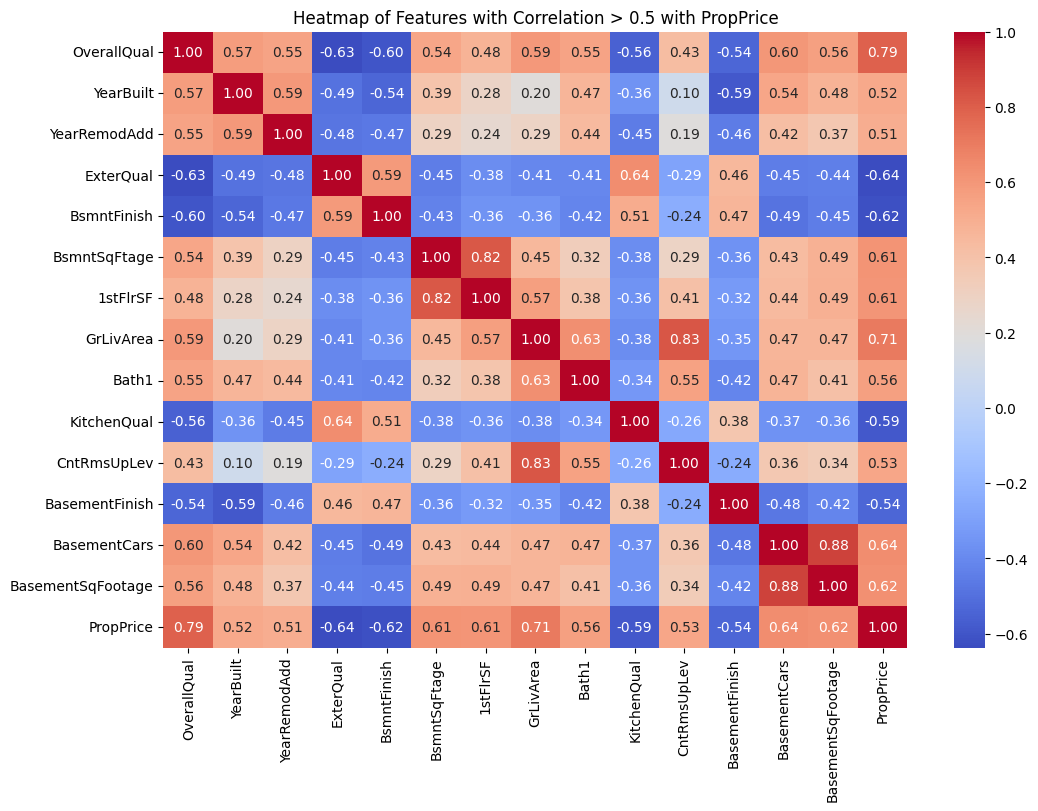

In [45]:
# prompt: heatMap of the features from df1 with correlation more than 0.5 with PropPrice

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming DF1 and features_with_high_correlation are defined from the previous code

# Select features with correlation > 0.5 with 'PropPrice'
df_heatmap = DF1[features_with_high_correlation.index]

# Calculate correlation matrix for selected features
correlation_matrix_heatmap = df_heatmap.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_heatmap, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Features with Correlation > 0.5 with PropPrice')
plt.show()

In [47]:
# prompt: Use the Chi2  to find the Features with more than 0,5 coorelation with PropPrice in DF1 dataFrame

from scipy.stats import chi2_contingency

# Assuming DF1 is your DataFrame and 'PropPrice' is the target variable

# Iterate through features (excluding 'PropPrice')
for feature in DF1.columns:
  if feature != 'PropPrice':
    # Create a contingency table for the feature and 'PropPrice'
    contingency_table = pd.crosstab(DF1[feature], DF1['PropPrice'])

    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Check if the correlation is significant (p-value < 0.05) and the chi-square statistic is greater than a threshold (e.g., 5)
    if p < 0.05 and chi2 > 5:
      print(f"Feature '{feature}' has a significant correlation with 'PropPrice' (Chi2: {chi2:.2f}, p-value: {p:.3f})")

Feature 'PropertyZone' has a significant correlation with 'PropPrice' (Chi2: 3147.89, p-value: 0.000)
Feature 'PropertyFrontage' has a significant correlation with 'PropPrice' (Chi2: 81762.77, p-value: 0.000)
Feature 'PropertySize' has a significant correlation with 'PropPrice' (Chi2: 735094.65, p-value: 0.000)
Feature 'Street' has a significant correlation with 'PropPrice' (Chi2: 888.31, p-value: 0.000)
Feature 'PropertyShape' has a significant correlation with 'PropPrice' (Chi2: 2446.24, p-value: 0.000)
Feature 'Orientation' has a significant correlation with 'PropPrice' (Chi2: 2771.99, p-value: 0.046)
Feature 'Neighborhood' has a significant correlation with 'PropPrice' (Chi2: 16898.76, p-value: 0.000)
Feature 'OverallQual' has a significant correlation with 'PropPrice' (Chi2: 9360.48, p-value: 0.000)
Feature 'OverallCond' has a significant correlation with 'PropPrice' (Chi2: 6300.01, p-value: 0.000)
Feature 'ExteriorCladdingType' has a significant correlation with 'PropPrice' (Chi2

In [ ]:
# prompt: suggest how we interpret chi2 score and P value for feature priority and selection for PropPrice

Okay, let's discuss how to interpret the Chi-Square test results for feature selection related to 'PropPrice' in your code.

**Understanding Chi-Square Test in This Context**

* **Purpose:** You are using the Chi-Square test to determine if there is a statistically significant association between categorical features and your target variable 'PropPrice'.  In essence, you want to identify features that seem to influence the property price.
* **Contingency Table:**  You create a contingency table for each feature against 'PropPrice'. This table shows the frequency counts of different combinations of feature values and 'PropPrice' values.
* **Chi-Square Statistic (χ²):** This statistic measures the difference between the observed frequencies in your contingency table and what you would expect if there were no relationship between the feature and 'PropPrice'. A higher χ² indicates a larger deviation from independence and suggests a stronger association.
* **P-value:** This value represents the probability of observing the obtained χ² statistic (or a more extreme one) if there were truly no association between the feature and 'PropPrice'. A lower p-value indicates stronger evidence against the null hypothesis (no association).

**Interpreting the Results for Feature Selection**

1. **Significant Correlation:** When you see `print(f"Feature '{feature}' has a significant correlation with 'PropPrice' (Chi2: {chi2:.2f}, p-value: {p:.3f})")`, it means the Chi-Square test found a statistically significant association between that feature and 'PropPrice'.
2. **Thresholds:** Your code sets a threshold for both the p-value (p < 0.05) and the chi-square statistic (chi2 > 5). This helps you filter out features that might show a slight association but are not strong enough to be considered important predictors.
    * **p-value < 0.05:** This is the typical significance level used in hypothesis testing. It suggests that there's a less than 5% chance of observing the data if there were no relationship.
    * **chi2 > 5:** This threshold helps to ensure that the observed association is not just due to random chance or a very weak effect.

**How to use this information for feature selection:**

* **Prioritize Features:** Features with a lower p-value (stronger evidence of association) and a higher Chi-Square statistic are likely to be more important predictors of 'PropPrice'.
* **Feature Ranking:** You could rank features based on their Chi-Square statistic or p-value to prioritize which features to include in your model.
* **Model Building:** Use the identified features as input variables in your regression model (e.g., linear regression).

**Important Considerations:**

* **Correlation vs. Causation:** Keep in mind that even though the Chi-Square test identifies a relationship between a feature and 'PropPrice', it doesn't necessarily mean that the feature directly causes a change in the property price. There might be other underlying factors at play.
* **Feature Engineering:**  You can potentially improve your model further by creating new features (derived variables) from existing ones that might have a more robust relationship with 'PropPrice'.
* **Model Evaluation:** After selecting features based on the Chi-Square test, you should train and evaluate your model (e.g., using RMSE) to ensure that the chosen features actually improve predictive performance.



**In Summary:**

The Chi-Square test provides a way to identify categorical features that likely have a significant influence on 'PropPrice'. By selecting features with statistically significant associations, you can build more accurate and informative models for predicting property prices.

In [52]:
# prompt: Split the data of DF1 in Train and Test set, 70 percent in Train and 30 percent in test

# Assuming DF1 is your DataFrame and 'PropPrice' is your target variable

# Split the data into training and testing sets
X = DF1.drop('PropPrice', axis=1)  # Features (all columns except 'PropPrice')
y = DF1['PropPrice']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you have:
# X_train: Training features
# X_test: Testing features
# y_train: Training target variable
# y_test: Testing target variable

In [53]:
# prompt: Build Regression Models Linear Regression, Logisctic Regression, Decision Tree, Random Forest,Support Vector Regressor, XGBoost,ADaboost and find the KPIS accuracy score,(y_predt,y_test), R2, MAE,RMSE,. Show them in Table

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = model.score(X_test, y_test)  # R-squared
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))


    results.append([name, accuracy, r2, mae, rmse])

# Create a Pandas DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "R2", "MAE", "RMSE"])

results_df

,Model,Accuracy,R2,MAE,RMSE
0,Linear Regression,0.864382,0.864382,20269.746831,30762.917895
1,Decision Tree,0.823841,0.823841,23796.867580,35060.673194
2,Random Forest,0.909204,0.909204,16056.743790,25171.084283
3,Support Vector Regressor,-0.031977,-0.031977,57037.416077,84860.062886
4,XGBoost,0.931141,0.931141,13767.273054,21920.355613
5,AdaBoost,0.862295,0.862295,22699.548863,30998.634585


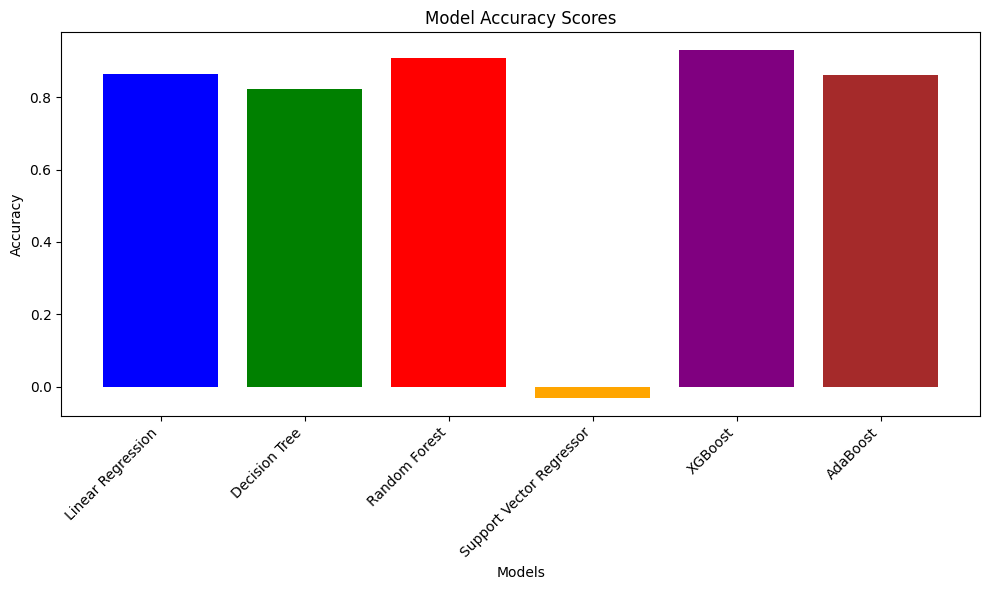

In [56]:
# prompt: Plot the Model  Accuracy scores in a Bar Plot with different colors, stop displaying R2,MAE,RMSE on the plot

import matplotlib.pyplot as plt

# Assuming 'results_df' is your DataFrame with model accuracy scores
model_names = results_df['Model']
accuracy_scores = results_df['Accuracy']

# Define a list of colors for the bars
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Scores")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [57]:
# prompt: Generate the Regression models with the features with correlation  value more than 0.5, different coors for the bars

# Assuming DF1 is your DataFrame and 'PropPrice' is your target variable

# Select features with correlation > 0.5 with 'PropPrice'
selected_features = features_with_high_correlation.index.tolist()
X = DF1[selected_features]
y = DF1['PropPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you have:
# X_train: Training features
# X_test: Testing features
# y_train: Training target variable
# y_test: Testing target variable


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regressor": SVR(),
    "XGBoost": XGBRegressor(),
    "AdaBoost": AdaBoostRegressor()
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = model.score(X_test, y_test)  # R-squared
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = sqrt(mean_squared_error(y_test, y_pred))


    results.append([name, accuracy, r2, mae, rmse])

# Create a Pandas DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "R2", "MAE", "RMSE"])

results_df


# Assuming 'results_df' is your DataFrame with model accuracy scores
model_names = results_df['Model']
accuracy_scores = results_df['Accuracy']

# Define a list of colors for the bars
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color=colors)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Scores")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

,Model,R2,MAE,RMSE
0,Linear Regression,1.000000,3.189461e-11,5.308602e-11
1,Decision Tree,0.999005,7.801507e+02,2.762332e+03
2,Random Forest,0.997687,6.685291e+02,4.212054e+03
3,Support Vector Regressor,-0.022420,5.945789e+04,8.855671e+04
4,XGBoost,0.997594,1.377427e+03,4.295524e+03
5,AdaBoost,0.989324,6.795917e+03,9.049102e+03


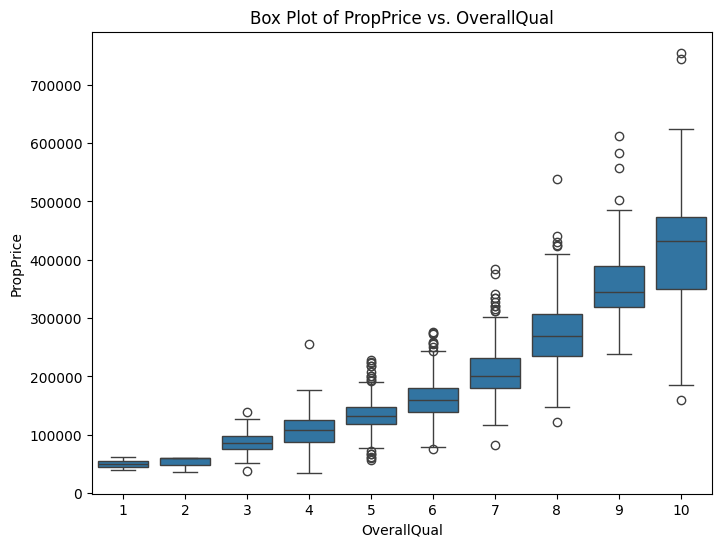

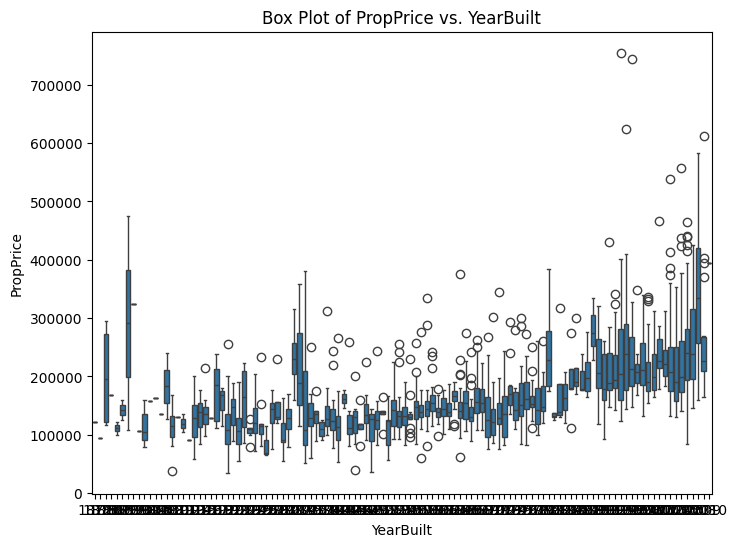

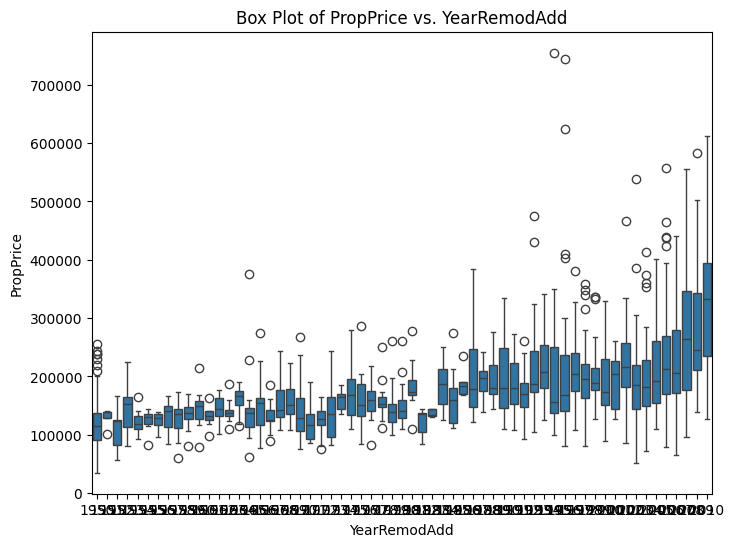

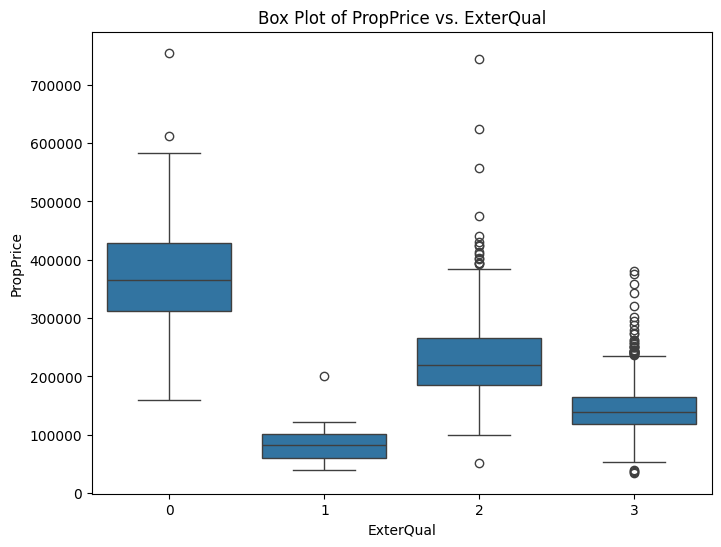

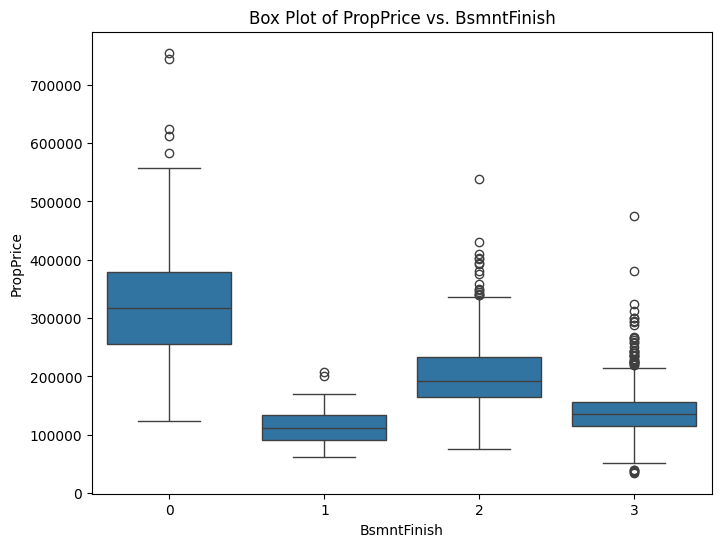

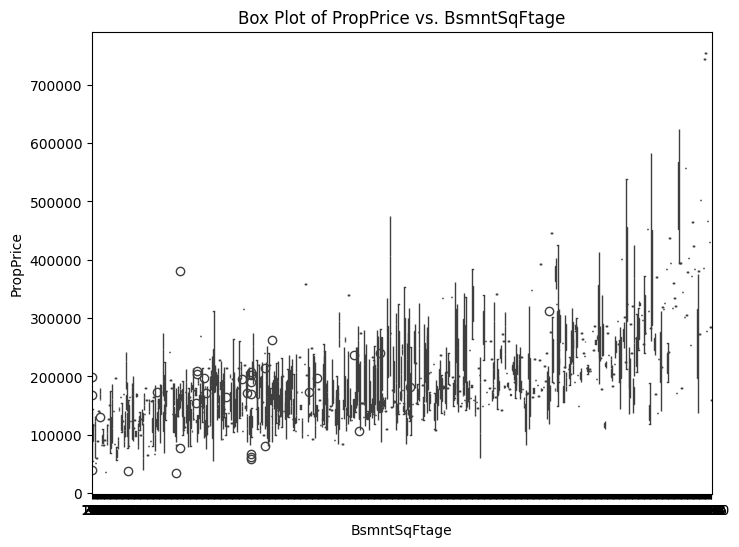

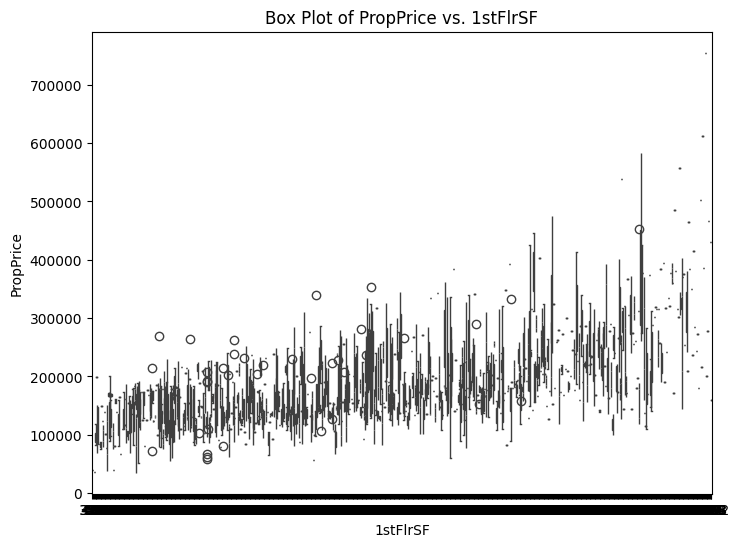

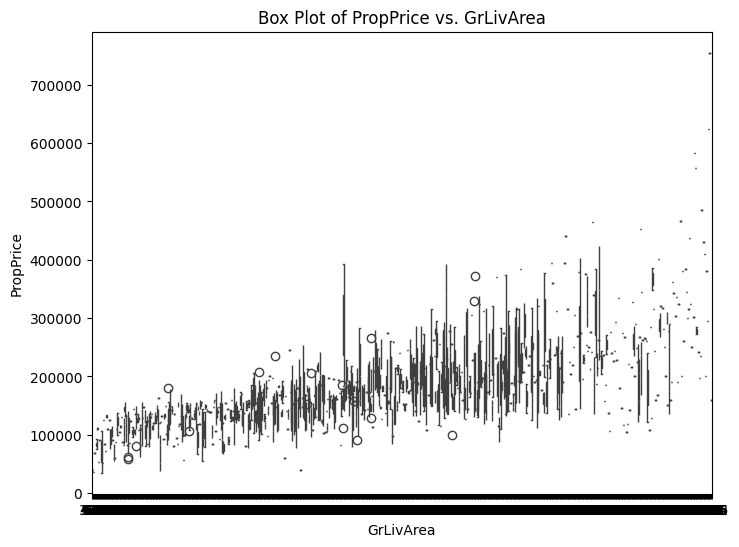

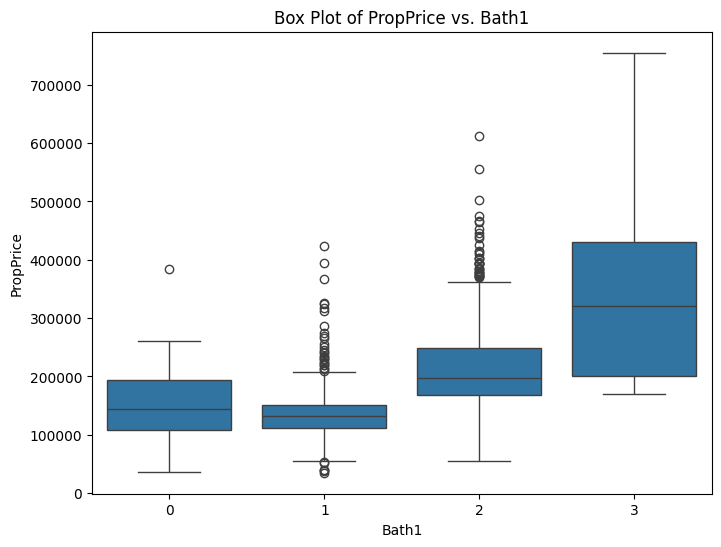

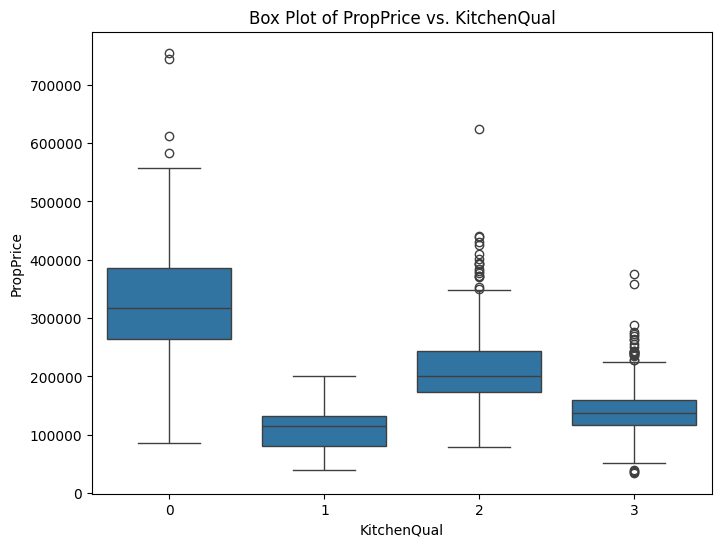

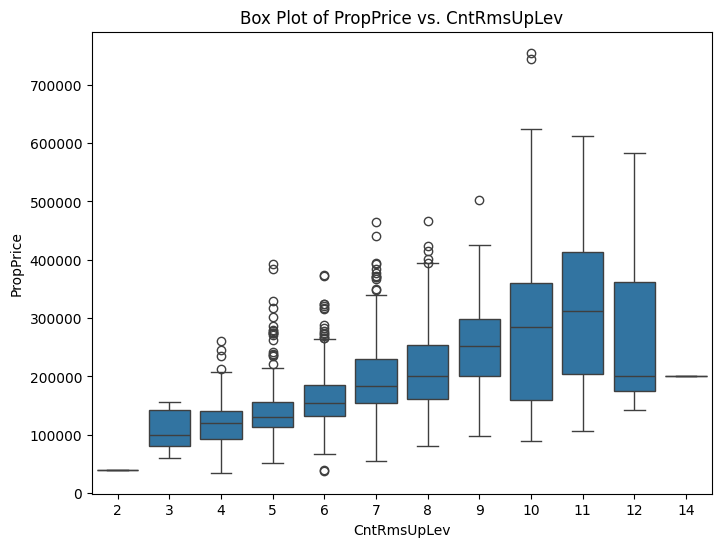

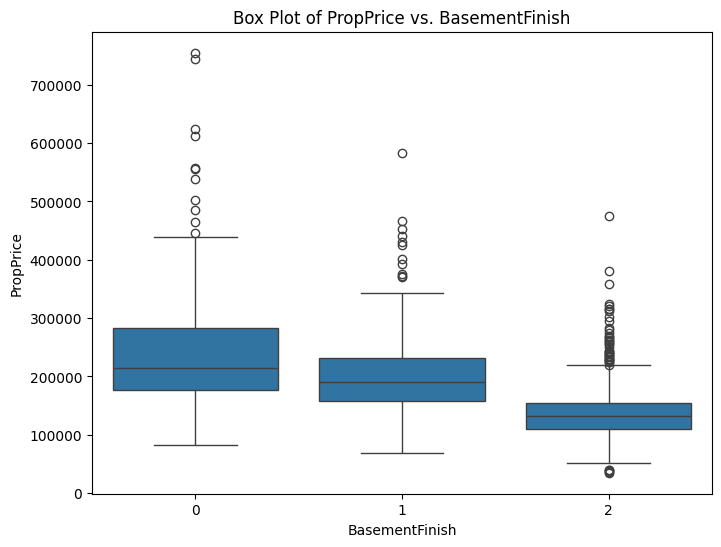

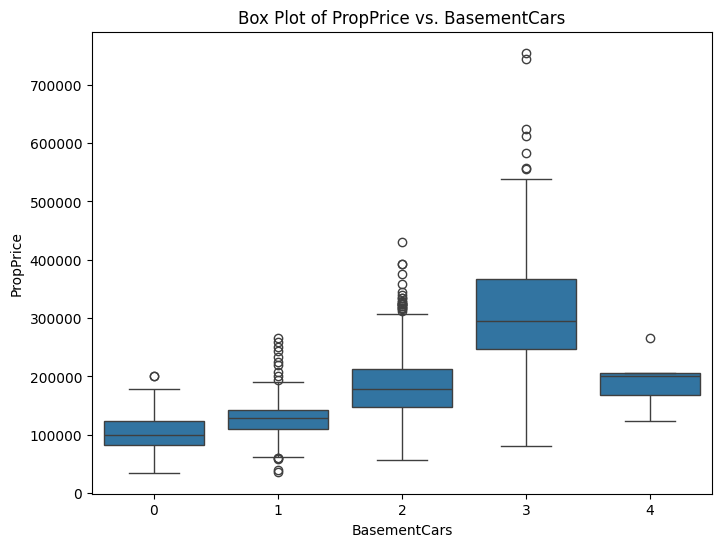

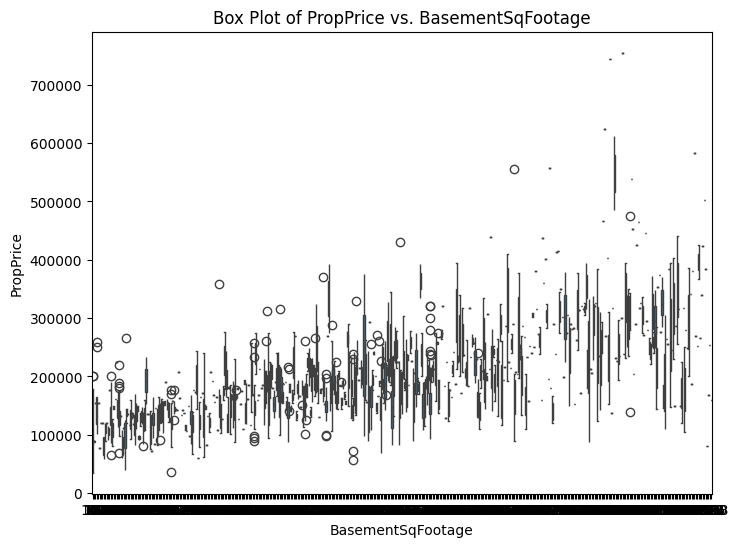

In [60]:
# prompt: Bivariate analysis  plots like box plot, bar plot , cout plot for the factors with correlation more than 0.5 with PropPrice , different coors for the bars

# Assuming DF1 is your DataFrame and 'PropPrice' is your target variable
for feature in features_with_high_correlation.index:
  if feature != 'PropPrice':
    plt.figure(figsize=(8, 6))

    # Box plot
    sns.boxplot(x=DF1[feature], y=DF1['PropPrice'])
    plt.title(f'Box Plot of PropPrice vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('PropPrice')
    plt.show()

    # Bar plot (if feature is categorical)
    if DF1[feature].dtype == 'object':
      plt.figure(figsize=(10, 6))
      sns.barplot(x=DF1[feature], y=DF1['PropPrice'])
      plt.title(f'Bar Plot of PropPrice vs. {feature}')
      plt.xlabel(feature)
      plt.ylabel('PropPrice')
      plt.xticks(rotation=45, ha="right")
      plt.show()

    # Count plot (if feature is categorical)
    if DF1[feature].dtype == 'object':
      plt.figure(figsize=(10, 6))
      sns.countplot(x=DF1[feature], hue=pd.cut(DF1['PropPrice'], bins=3))  # You can adjust the number of bins
      plt.title(f'Count Plot of {feature} with PropPrice Categories')
      plt.xlabel(feature)
      plt.ylabel('Count')
      plt.xticks(rotation=45, ha="right")
      plt.show()

In [61]:
# prompt: code to find outliers on the features with high correlation with PropPrice in DF data Frame

# Assuming DF1 is your DataFrame and 'PropPrice' is your target variable
for feature in features_with_high_correlation.index:
  if feature != 'PropPrice':
    # Calculate the IQR for the feature
    Q1 = DF1[feature].quantile(0.25)
    Q3 = DF1[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = DF1[(DF1[feature] < lower_bound) | (DF1[feature] > upper_bound)]

    # Print the outliers for the current feature
    print(f"Outliers for {feature}:\n{outliers}")

    # You can also remove the outliers if needed:
    # DF1 = DF1[(DF1[feature] >= lower_bound) & (DF1[feature] <= upper_bound)]

Outliers for feature 'OverallQual':
     OverallQual  PropPrice
375            1      61000
533            1      39300
Outliers for feature 'YearBuilt':
      YearBuilt  PropPrice
304        1880     295000
630        1880     124000
747        1880     265979
991        1882     168000
1132       1880     117500
1137       1875      94000
1349       1872     122000
Outliers for feature 'ExterQual':
      ExterQual  PropPrice
11            0     345000
34            0     277500
45            0     319900
58            0     438780
95            0     185000
178           0     501837
196           0     311872
224           0     386250
238           0     318000
278           0     415298
343           0     266000
349           0     437154
350           0     318061
389           0     426000
412           0     222000
440           0     555000
477           0     380000
515           0     402861
523           0     184750
527           0     446261
540           0     315000
58